<a href="https://colab.research.google.com/github/JuliaRapala/My-Python-Journey/blob/main/analysis_of_an_article_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔮 **Analysis of "How Accurate Are Tarot Readings?"**🔮

By implementing a couple of NLP methods I will be able to see recurring linguistic patterns in the analyzed text. I will be using `BeautifulSoup` to scrape an article from https://eastbayexpress.com. I will import `NLTK` Python Library, which will help with tokenizing the words. After that I will illustrate the distribution of most-often used:


*   Verbs
*   Nouns
*   Adjectives
*   Adverbs






## 🪄1. Importing Python Libraries 🪄


*   Taking the web page
*   Parsing
*   Refining the extracted data



In [1]:
import requests
from bs4 import BeautifulSoup
import re

## 🌔 2. Web scraping 🌒

In [2]:
URL = "https://eastbayexpress.com/how-accurate-are-tarot-readings/"
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

## 🎴3. Cleaning the text from the website🎴


*   Removing citations
*   Removing tabs, newlines, double spaces



In [3]:
paragraphs = [p.get_text().strip() for p in soup.find_all('p')]
clean_paragraphs = []
for para in paragraphs:
  para = re.sub(r'\[[^\]]*\]', '', para)
  para = re.sub(r'\s+', ' ', para)
  clean_paragraphs.append(para.strip())

full_text = ' '.join(clean_paragraphs)

N = 8
print("\n".join(clean_paragraphs[:N]))

Published in cooperation between Aura Psychics and the East Bay Express
Ever flipped through a deck of tarot cards and wondered, “Wait, do these things work?” Tarot is a super old practice that’s all about using cards to get a glimpse into your life. Pretty cool, right?
But the question is, how accurate are tarot readings? Spiritualists believe that tarot cards can be very accurate but there are many things to consider when getting a tarot reading.
So, let’s jump down the tarot rabbit hole and see what it’s all about, whether it really works, and where you can get some accurate tarot readings.
A tarot reading is a fascinating practice in which practitioners use special cards with pictures to analyze the events in your life using symbolism.
It’s not exactly about predicting the future like most of the best psychics focus on. Instead, think of the cards as a key that unlocks your intuition and helps you explore all the hidden thoughts and feelings bubbling internally.
Here’s a breakdown 

## 🌟4. Tokenizing and tagging parts of speech🌟

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
tokens = word_tokenize(full_text)
tokens = [word.lower() for word in tokens if word.isalpha()]
pos_tags = pos_tag(tokens)
print(f"Total tokens (words): {len(tokens)}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Total tokens (words): 1810


## 👁5. Counting words by their POS👁

In [5]:
from collections import Counter, defaultdict
categories = {
  'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
  'Verbs': ['VB', 'VBG', 'VBD', 'VBZ', 'VBN', 'VBP'],
  'Adjectives': ['JJ', 'JJS', 'JJR'],
  'Adverbs': ['RB', 'RBS', 'RBR']
}

pos_counter = Counter()
category_words = defaultdict(list)
for word, tag in pos_tags:
  for category, tag_list in categories.items():
    if tag in tag_list:
      pos_counter[category] += 1
      category_words[category].append(word)

print("Word counts per category:", pos_counter)

Word counts per category: Counter({'Nouns': 464, 'Verbs': 334, 'Adjectives': 196, 'Adverbs': 67})


## 🌙6. Implementing a module for making plots in Python🌙


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 🌓7. Creating bar plots for top 10 words per POS category🌓

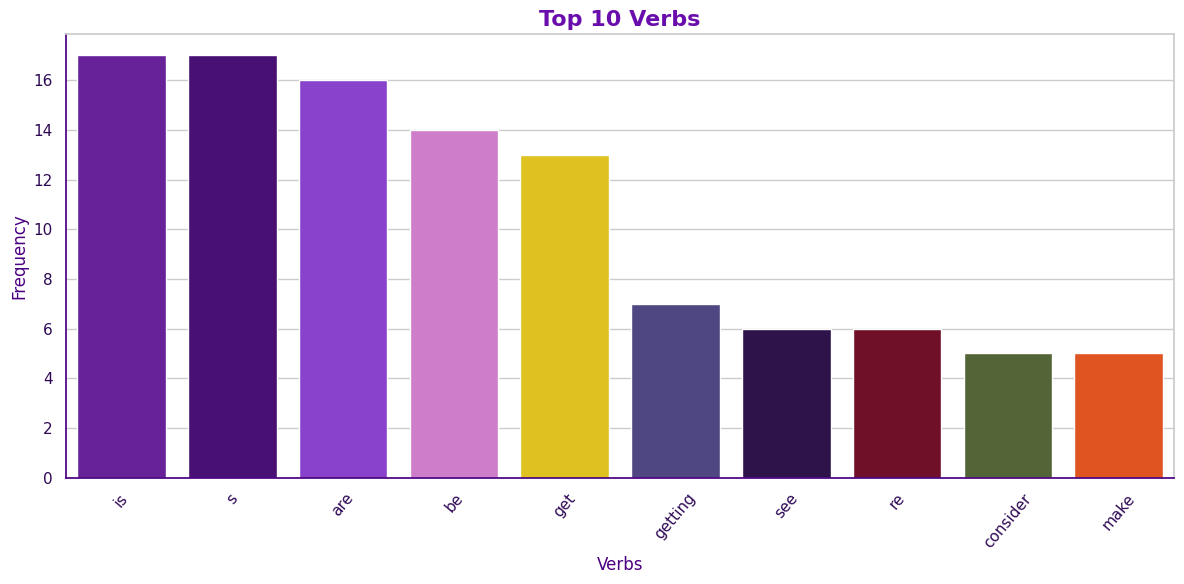

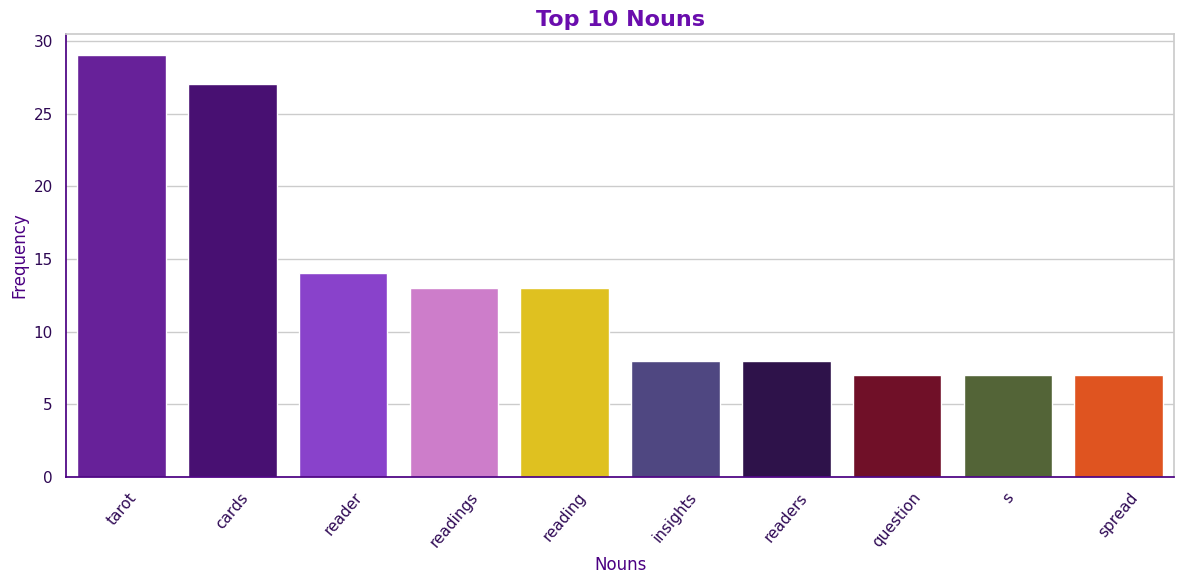

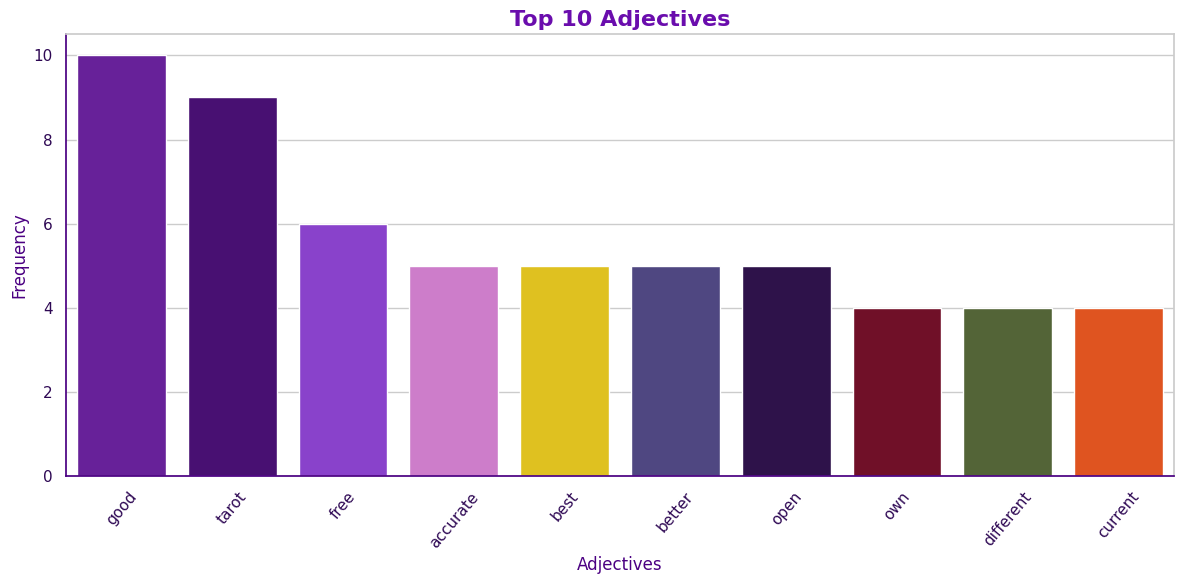

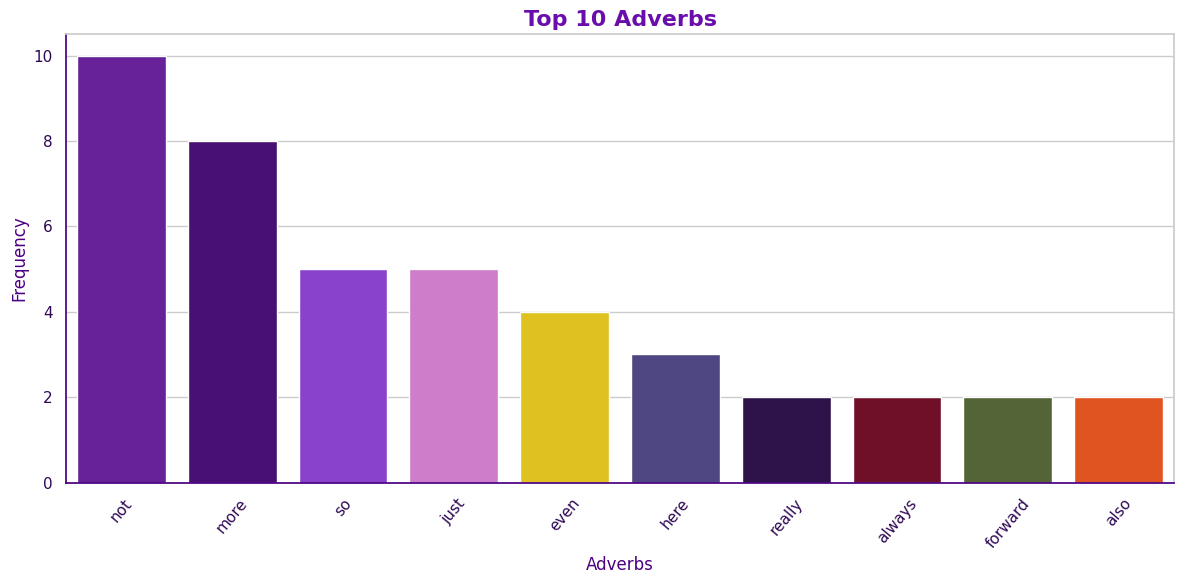

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

witchy_palette = ['#6A0DAD', '#4B0082', '#8A2BE2', '#DA70D6', '#FFD700', '#483D8B', '#2E0854', '#800020', '#556B2F', '#FF4500']

for cat, words in category_words.items():
  top_words = Counter(words).most_common(10)
  labels, counts = zip(*top_words)

  plt.figure(figsize=(12,6))
  sns.barplot(x=list(labels), y=list(counts), palette=witchy_palette)
  plt.title(f"Top 10 {cat}", fontsize=16, fontweight='bold', color='#6A0DAD')
  plt.ylabel("Frequency", fontsize=12, color='#4B0082')
  plt.xlabel(f"{cat}", fontsize=12, color='#4B0082')
  plt.xticks(rotation=50, color='#2E0854', fontsize=11)
  plt.yticks(color='#2E0854')
  plt.gca().spines['bottom'].set_color('#4B0082')
  plt.gca().spines['left'].set_color('#4B0082')
  plt.tight_layout()
  plt.show()

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

## 🧿8. Creating a pie chart🧿

<function matplotlib.pyplot.show(close=None, block=None)>

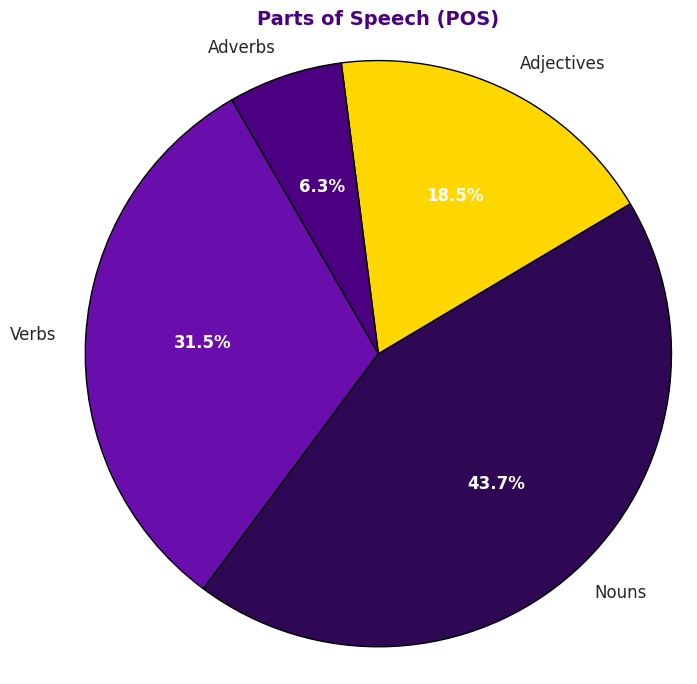

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
mystic_colors = ['#6A0DAD', '#2E0854', '#FFD700', '#4B0082', '#483D8B', '#DA70D6']

labels = pos_counter.keys()
sizes = pos_counter.values()

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=mystic_colors[:len(labels)],
    autopct='%1.1f%%',
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize':12}
)

for autotext in autotexts:
  autotext.set_color('white')
  autotext.set_fontweight('bold')

plt.title("Parts of Speech (POS)", fontsize=14, fontweight='bold', color='#4B0082')
plt.axis('equal')
plt.tight_layout()
plt.show

# ✨Conclusions✨
The article **"How Accurate Are Tarot Readings?"** consists of:


*   464 Nouns
*   334 Verbs
*   196 Adjectives
*   67 Adverbs

Basing on these categories and the numbers they provide we can clearly see that the article portrays a strong emphasis on **concepts** and **objects**. We can see that the author focused on discussing concrete ideas tied to tarot reading - namely: _"cards"_, _"readings"_, _"accuracy"_, _"spread"_, or _"reader"_. This points to an educational style which highlights the most crucial concepts.

The number of **verbs** can be considered as fairly high or moderate. This leads us to the conclusion that that there are numerous explanations of processes and/or actions, e.g. how we can conduct tarot readings and how they can be interpreted. The number of verbs also shows dynamics.

Relatively high number of **adjectives** indicates nuance, and possibly in this context - mysticism. It also shows how subjective the approach might have been, for many tarot readings are highly emotional and spiritual experiences, therefore the need for using many adjectives is perefectly justified.

Lower use of **adverbs** can be understood as an author's choice to be more direct and straightforward. Perhaps the actions do not need an explanation _how_ they are being performed, rather we should approach the topic **without unnecessary flowery language**.




